In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
df=pd.read_csv('final.csv')

In [4]:
print(df.head())

   Unnamed: 0                channel_id      view1      view2     view3  \
0           0  UC1zZE_kJ8rQHgLTVfobLi_g    42745.0   206163.0  149326.0   
1           1  UCpVm7bg6pXKo1Pr6k5kxG9A    28869.0    98463.0   83194.0   
2           2  UCggHoXaj8BQHIiPmOxezeWA  1470242.0  1712722.0  478876.0   
3           3  UCsooa4yRKGN_zEE8iknghZA   102739.0   481163.0  368914.0   
4           4  UCXhSCMRRPyxSoyLSPFxK7VA   181258.0    77071.0  110696.0   

      view4      view5      view6      view7      view8  ...       dur9  \
0  132617.0   186354.0   291737.0   207239.0   309042.0  ...  13.966667   
1   15905.0     9551.0    11575.0    53867.0    89053.0  ...  31.166667   
2  754971.0  1182122.0  1978969.0  1790022.0  2771459.0  ...  31.066667   
3     144.0   704057.0  1198252.0   987602.0   412818.0  ...   5.400000   
4  193948.0   136194.0   408614.0   142050.0   226492.0  ...  10.950000   

       dur10   duration  no_of_videos  subsCount  \
0  12.250000  17.250000          1525   124000

(98, 40)


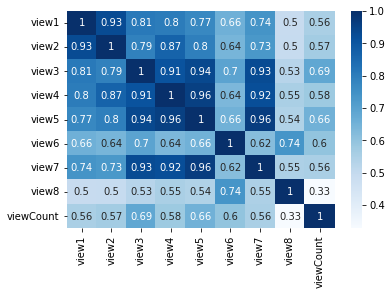

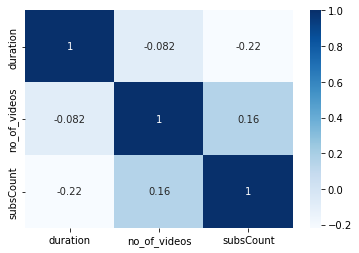

In [5]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
print(df.shape)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['view1', 'view2', 'view3', 'view4','view5','view6','view7','view8','viewCount',]].corr(), cmap='Blues', annot=True)
plt.show()

sns.heatmap(df[['duration','no_of_videos','subsCount']].corr(), cmap='Blues', annot=True)
plt.show()

In [6]:
#data cleaning
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
print(df.shape)

columns=['view1', 'view2', 'view3', 'view4', 'view5', 'view6', 'view7', 'view8', 'view9', 'view10', 
                           'engage1','engage2','engage3','engage4','engage5','engage6','engage7','engage8','engage9','engage10',
                           'dur1','dur2','dur3','dur4','dur5','dur6','dur7','dur8','dur9','dur10',
                           'duration','no_of_videos','subsCount','viewCount']


for col in columns:
    df[col]=df[col].astype('int')

(98, 40)


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['view1', 'view2', 'view3', 'view4', 'view5', 'view6', 'view7', 'view8', 'view9', 'view10', 
                           'engage1','engage2','engage3','engage4','engage5','engage6','engage7','engage8','engage9','engage10',
                           'dur1','dur2','dur3','dur4','dur5','dur6','dur7','dur8','dur9','dur10',
                           'duration','no_of_videos','subsCount','Clickbait_title','Clickbait_thumbnail']]
y = df['viewCount']

# standardize the independent variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# calculate the variance explained by each component
explained_variance = pca.explained_variance_ratio_

# select the components that explain most of the variance
n_components = 4
X = X_pca[:, :n_components]

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=207)

In [9]:
regr = LinearRegression()

data = {
    'R2':[],
    'MSE': [],
    'RMSE': [],
    'MAE':[],
    'MAPE':[],
}
testSize=[0.15,0.2,0.25]


for i in testSize:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=1111)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    score = regr.score(X_test, y_test)

    mse = mean_squared_error(y_pred,y_test)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    data['R2'].append(score)
    data['MSE'].append(mse)
    data['RMSE'].append(rmse)
    data['MAE'].append(mae)
    data['MAPE'].append(mape)
    
LinReg = pd.DataFrame(data, index=['TestSize=0.15', 'TestSize=0.20', 'TestSize=0.25'])
display(LinReg)
    

,R2,MSE,RMSE,MAE,MAPE
TestSize=0.15,0.783364,2.903315e+11,538824.178747,379913.314006,47.352389
TestSize=0.20,0.804245,2.841083e+11,533018.063984,406442.096525,44.574970
TestSize=0.25,0.744545,3.051156e+11,552372.656294,426194.324529,34.080871


In [10]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=12)

data = {
    'R2':[],
    'MSE': [],
    'RMSE': [],
    'MAE':[],
    'MAPE':[],
}
testSize=[0.15,0.2,0.25]


for i in testSize:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=1111)
    dt_regressor.fit(X_train, y_train)
    y_pred = dt_regressor.predict(X_test)

    score = dt_regressor.score(X_test, y_test)

    mse = mean_squared_error(y_pred,y_test)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    data['R2'].append(score)
    data['MSE'].append(mse)
    data['RMSE'].append(rmse)
    data['MAE'].append(mae)
    data['MAPE'].append(mape)
    
DesTree = pd.DataFrame(data, index=['TestSize=0.15', 'TestSize=0.20', 'TestSize=0.25'])
display(DesTree)


,R2,MSE,RMSE,MAE,MAPE
TestSize=0.15,-0.922693,2.576760e+12,1.605229e+06,689937.6,47.467331
TestSize=0.20,0.530392,6.815622e+11,8.255678e+05,434877.4,18.293266
TestSize=0.25,-9.674785,1.274998e+13,3.570712e+06,989736.0,71.348115


In [11]:
from sklearn.svm import SVR


svr = SVR(kernel='rbf', C=1e2, gamma=0.3)

data = {
    'R2':[],
    'MSE': [],
    'RMSE': [],
    'MAE':[],
    'MAPE':[],
}
testSize=[0.15,0.2,0.25]


for i in testSize:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=1111)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    score = svr.score(X_test, y_test)

    mse = mean_squared_error(y_pred,y_test)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    data['R2'].append(score)
    data['MSE'].append(mse)
    data['RMSE'].append(rmse)
    data['MAE'].append(mae)
    data['MAPE'].append(mape)
    
SVR = pd.DataFrame(data, index=['TestSize=0.15', 'TestSize=0.20', 'TestSize=0.25'])
display(SVR)


,R2,MSE,RMSE,MAE,MAPE
TestSize=0.15,-0.106713,1.483198e+12,1.217866e+06,445177.930834,18.764721
TestSize=0.20,-0.134574,1.646656e+12,1.283221e+06,513267.311806,15.563696
TestSize=0.25,-0.100852,1.314859e+12,1.146673e+06,436344.076890,16.098918


In [12]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
data = {
    'R2':[],
    'MSE': [],
    'RMSE': [],
    'MAE':[],
    'MAPE':[],}
testSize=[0.15,0.2,0.25]


for i in testSize:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=1111)
    xgb_regressor.fit(X_train, y_train)
    y_pred = xgb_regressor.predict(X_test)
    score = xgb_regressor.score(X_test, y_test)
    mse = mean_squared_error(y_pred,y_test)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    data['R2'].append(score)
    data['MSE'].append(mse)
    data['RMSE'].append(rmse)
    data['MAE'].append(mae)
    data['MAPE'].append(mape)
    
XGBoost = pd.DataFrame(data, index=['TestSize=0.15', 'TestSize=0.20', 'TestSize=0.25'])
display(XGBoost)



,R2,MSE,RMSE,MAE,MAPE
TestSize=0.15,-0.333153,1.786669e+12,1.336663e+06,618823.661328,48.440166
TestSize=0.20,0.047460,1.382463e+12,1.175782e+06,573337.099414,26.298934
TestSize=0.25,-0.356733,1.620485e+12,1.272983e+06,531248.422070,30.759113


In [13]:
print('Linear Regresion Result')
display(LinReg)
print('Decision Tree Regressor Result')
display(DesTree)
print('SVR Result')
display(SVR)
print('XGBoost Regressor Result')
display(XGBoost)

Linear Regresion Result


,R2,MSE,RMSE,MAE,MAPE
TestSize=0.15,0.783364,2.903315e+11,538824.178747,379913.314006,47.352389
TestSize=0.20,0.804245,2.841083e+11,533018.063984,406442.096525,44.574970
TestSize=0.25,0.744545,3.051156e+11,552372.656294,426194.324529,34.080871


Decision Tree Regressor Result


,R2,MSE,RMSE,MAE,MAPE
TestSize=0.15,-0.922693,2.576760e+12,1.605229e+06,689937.6,47.467331
TestSize=0.20,0.530392,6.815622e+11,8.255678e+05,434877.4,18.293266
TestSize=0.25,-9.674785,1.274998e+13,3.570712e+06,989736.0,71.348115


SVR Result


,R2,MSE,RMSE,MAE,MAPE
TestSize=0.15,-0.106713,1.483198e+12,1.217866e+06,445177.930834,18.764721
TestSize=0.20,-0.134574,1.646656e+12,1.283221e+06,513267.311806,15.563696
TestSize=0.25,-0.100852,1.314859e+12,1.146673e+06,436344.076890,16.098918


XGBoost Regressor Result


,R2,MSE,RMSE,MAE,MAPE
TestSize=0.15,-0.333153,1.786669e+12,1.336663e+06,618823.661328,48.440166
TestSize=0.20,0.047460,1.382463e+12,1.175782e+06,573337.099414,26.298934
TestSize=0.25,-0.356733,1.620485e+12,1.272983e+06,531248.422070,30.759113
